In [1]:
import pandas as pd
import networkx as nx
import os
import pickle
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import seaborn as sns


In [26]:
networks_metadata = pd.read_csv('networks_metadata')

In [31]:
networks_metadata.groupby(['is_polyploid']).count()



,Node,Species,Id,cc,dc,clusr,redundancy,pr_ec,network_ind,network_type,network_source,id_str,cc_norm,dc_norm,redundancy_norm,clusr_norm,pr_ec_norm
is_polyploid,,,,,,,,,,,,,,,,,
0.0,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801,2769,2769,2769,2769,2769
1.0,1835,1835,1835,1835,1835,1835,1835,1835,1835,1835,1835,1835,1820,1820,1820,1820,1820


In [27]:
networks_metadata  = networks_metadata[(networks_metadata['is_polyploid'].notna())&(networks_metadata['network_source']!='all')]

networks_metadata["id_str"] = networks_metadata["network_source"].astype(str) +"-"+ networks_metadata["network_type"].astype(str)+"-"+ networks_metadata["network_ind"].astype(str)
networks_metadata["cc_norm"] = networks_metadata.groupby(["id_str"]).transform(lambda x:(x - x.mean()) / (x.std()+0.01))["cc"]
networks_metadata["dc_norm"] = networks_metadata.groupby(["id_str"]).transform(lambda x:(x - x.mean()) / (x.std()+0.01))["dc"]
networks_metadata["redundancy_norm"] = networks_metadata.groupby(["id_str"]).transform(lambda x:(x - x.mean()) / (x.std()+0.01))["redundancy"]
networks_metadata["clusr_norm"] = networks_metadata.groupby(["id_str"]).transform(lambda x:(x - x.mean()) / (x.std()+0.01))["clusr"]
networks_metadata["pr_ec_norm"] = networks_metadata.groupby(["id_str"]).transform(lambda x:(x - x.mean()) / (x.std()+0.01))["pr_ec"]


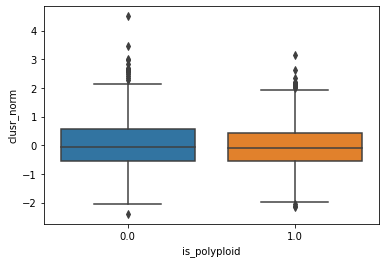

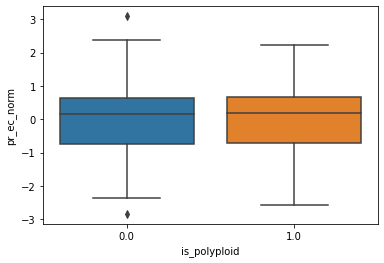

In [22]:
ax = sns.boxplot(y="clusr_norm", x = "is_polyploid", data=networks_metadata)
plt.show()

ax = sns.boxplot(y="pr_ec_norm", x = "is_polyploid", data=networks_metadata)
plt.show()



In [25]:
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
svc = svm.SVC(C=100.0,kernel='poly')

X_train, X_test, y_train, y_test = train_test_split(networks_metadata[["cc_norm","dc_norm","redundancy_norm","clusr_norm","pr_ec_norm"]], networks_metadata['is_polyploid'], test_size=0.3,random_state=1)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [17]:
networks_metadata[networks_metadata['id_str']=='literature-weighted-0.0']

,network_source,Node,Species,Id,is_polyploid,cc,dc,clusr,redundancy,pr_ec,network_ind,network_type,id_str,cc_norm,dc_norm,redundancy_norm,clusr_norm,pr_ec_norm
0,literature,ranunculus acris,ranunculus acris,2470.0,0.0,0.434211,0.187635,0.155123,0.214286,0.343564,0.0,weighted,literature-weighted-0.0,0.188372,0.156980,0.160216,0.297083,0.542063
1,literature,trifolium repens,trifolium repens,1532.0,1.0,0.314286,0.149871,0.122378,0.107143,0.172746,0.0,weighted,literature-weighted-0.0,-1.438259,-0.038961,-0.040923,-0.273823,-1.901312
2,literature,trifolium pratense,trifolium pratense,4293.0,0.0,0.458333,0.230271,0.117878,0.142857,0.358314,0.0,weighted,literature-weighted-0.0,0.515568,0.378199,0.026123,-0.352276,0.753052
3,literature,prunella grandiflora,prunella grandiflora,5284.0,0.0,0.407407,0.072058,0.093735,0.000000,0.251335,0.0,weighted,literature-weighted-0.0,-0.175179,-0.442695,-0.242063,-0.773205,-0.777174
5,literature,geranium sylvaticum,geranium sylvaticum,903.0,0.0,0.388235,0.001603,0.228492,1.000000,0.309443,0.0,weighted,literature-weighted-0.0,-0.435225,-0.808253,1.635238,1.576270,0.054006
6,literature,heracleum sphondylium,heracleum sphondylium,438.0,0.0,0.550000,0.598626,0.082001,0.053333,0.338407,0.0,weighted,literature-weighted-0.0,1.758913,2.289418,-0.141940,-0.977777,0.468301
7,literature,aegopodium podagraria,aegopodium podagraria,3601.0,1.0,0.412500,0.099462,0.111319,0.476190,0.309443,0.0,weighted,literature-weighted-0.0,-0.106104,-0.300510,0.651890,-0.466630,0.054006
8,literature,plantago lanceolata,plantago lanceolata,4157.0,0.0,0.434211,0.076893,0.139033,0.166667,0.358314,0.0,weighted,literature-weighted-0.0,0.188372,-0.417608,0.070821,0.016565,0.753052
9,literature,plantago media,plantago media,1878.0,1.0,0.383721,0.000000,0.192789,-1.000000,0.309443,0.0,weighted,literature-weighted-0.0,-0.496457,-0.816570,-2.119364,0.953793,0.054006


In [ ]:
networks_metadata.groupby